# Modeling techniques for linear plant
## Case of first and second order models
### Ordinary Differentiel Equation (ODE) - Transfer Function (TF) - State Space (SS) 
#### Textbook is available @: [https://www.github.com/a-mhamdi/shelf_textbook](https://www.github.com/a-mhamdi/shelf_textbook)
----

In [51]:
import numpy as np

In [52]:
from scipy.integrate import odeint

In [53]:
from scipy.signal import impulse, step, TransferFunction as tf, StateSpace as ss

In [54]:
import matplotlib.pyplot as plt

In [55]:
plt.rcParams['figure.dpi'] = 300
plt.rcParams['font.family'] = ['fantasy']
plt.rcParams['font.fantasy'] = ['Comic Sans MS']

# CASE OF FIRST ORDER PLANT

$$\tau\dfrac{dy}{dt}+y(t) \;=\; k\times u(t),\qquad\text{where: y(t=0) = 0}$$

In [56]:
                  #########################
k, tau = 2.0, 0.5 # SIMULATION'S SETTINGS #
                  #########################

In [57]:
tstart, tstep, tstop = 0, .01, 7
tspan = np.arange(tstart, tstop, tstep)

**Numeric Integration: ODE**

***Euler forward approximation***

$$\tau\dfrac{y_{i+1}-y_i}{tstep}+y_i \;=\; k\times u_i,\qquad\text{where: $tstep$ denotes the sampling period}$$
Thus yields the following recurrent formula regarding the output $y$ at time-stamp $t\,=\,(i+1)tstep$
$$y_{i+1} \;=\; \left(1+\dfrac{tstep}{\tau}\right)y_i+k\dfrac{tstep}{\tau}u_i$$

In [58]:
u = np.ones_like(tspan)

In [59]:
ratio = tstep/tau
y = np.zeros_like(tspan)
for i in range(1, len(tspan)):
    y[i] = (1-ratio)*y[i-1] + k*ratio*u[i-1]


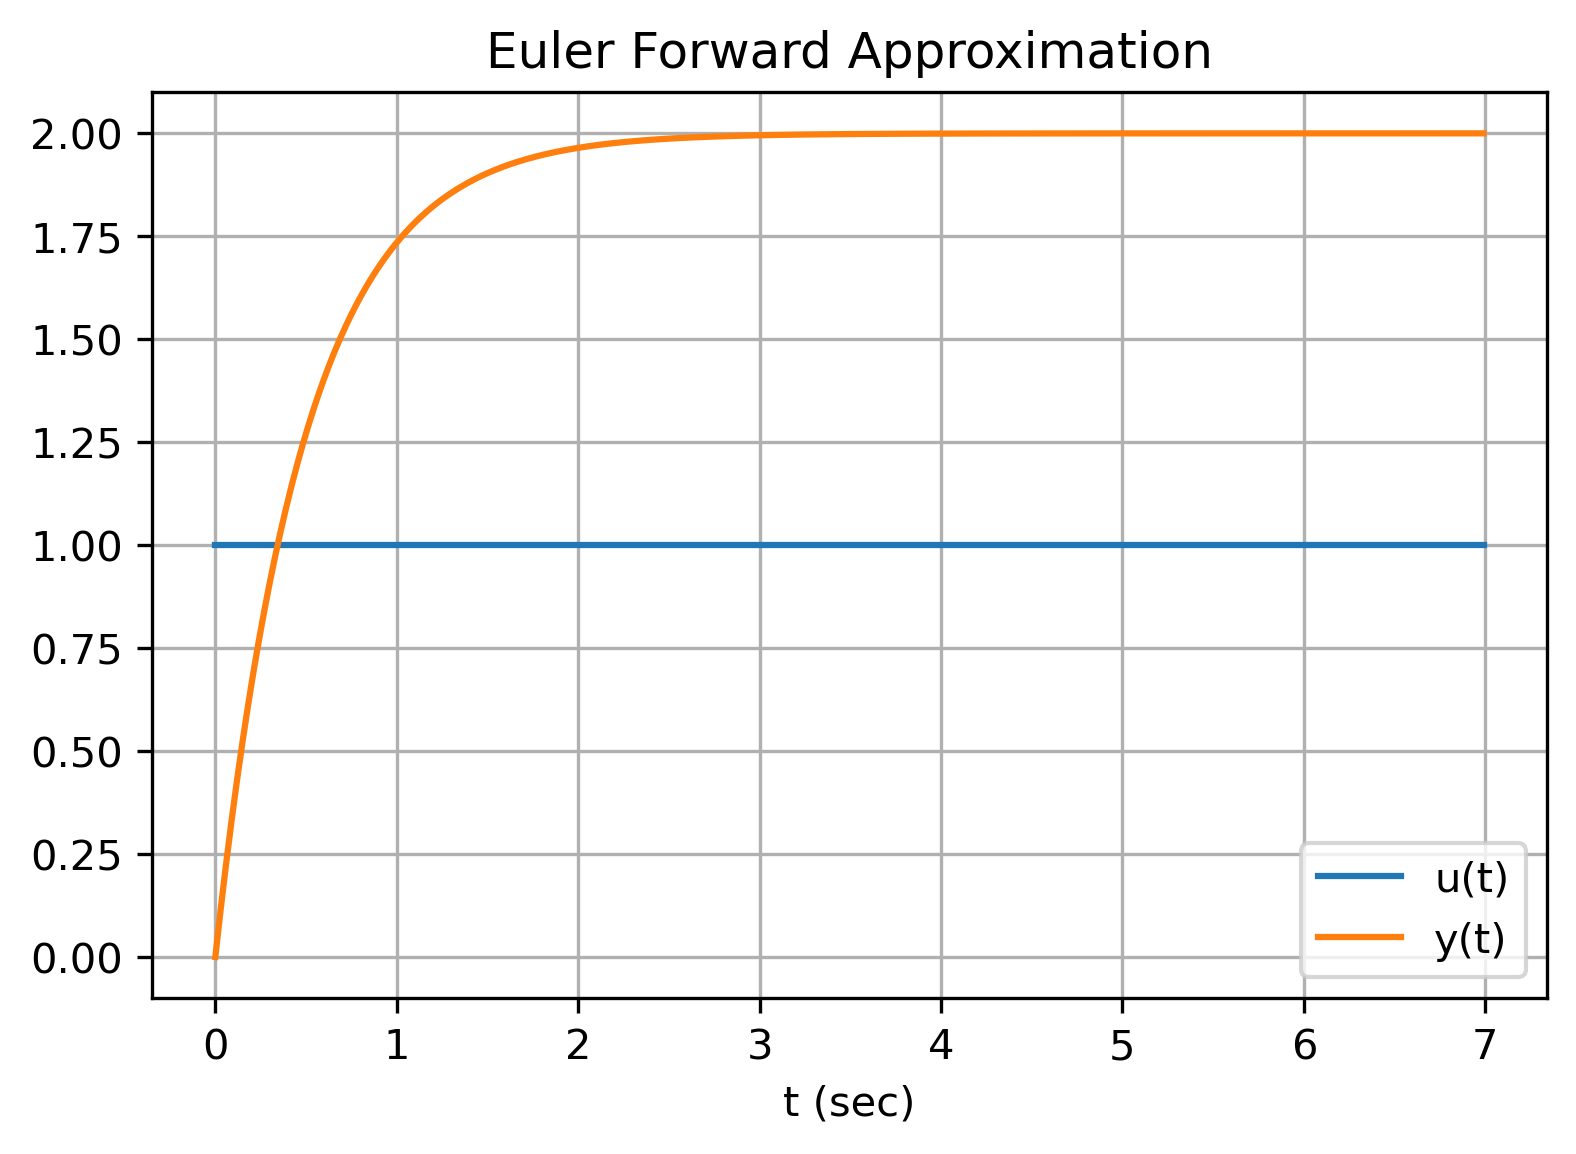

In [60]:
plt.plot(tspan, u, tspan, y)
plt.title('Euler Forward Approximation')
plt.xlabel('t (sec)')
plt.legend(['u(t)', 'y(t)'])
plt.grid()

In case of a more generalized form of input $u$, for instance, $$u(t) \;=\; \Gamma-0.25\Gamma_2-1.3\Gamma_5$$
We can define a new method that permits to generate the sequence of data $u_k$ given the definition of $u$.

In [61]:
def gt(t, tau: float=0):
    """
    Generates data which are equivalent to the definition of the delayed Heaviside function, i.e., r$\Gamma(t-\tau)$
    Params:
        - t: array_like
            Input time array
        - tau: float
            Time delay
    Return:
        - Array of same dimension of t. Every point is equal to 1 iff the corresponding time point is greater than tau.
    """
    return ( t>=tau ).astype(int)

In [62]:
u = gt(tspan)-.25*gt(tspan, 2)-1.3*gt(tspan, 5)

***Built-in method***

In [63]:
# 0.5*dy/dt + y(t) = 2*u(t),	y(t=0) = 0
def mySys(x, t):
	u = 1
	return 1/0.5*(-x + 2*u)

In [64]:
tspan = np.linspace(0.0, 7.0, 100)
y1 = odeint(mySys, 0, tspan)

**Transfer Function**

In [65]:
# 0.5*dy/dt + y(t) = 2*u(t),	y(t=0) = 0
hTF = tf([k], [tau, 1])
_, y2 = step(hTF, T=tspan)

**State Space**

In [66]:
# 0.5*dy/dt + y(t) = 2*u(t),	y(t=0) = 0
A, B, C, D = -1/tau, k/tau, 1, 0
hSS = ss(A, B, C, D)
_, y3 = step(hSS, T=tspan)

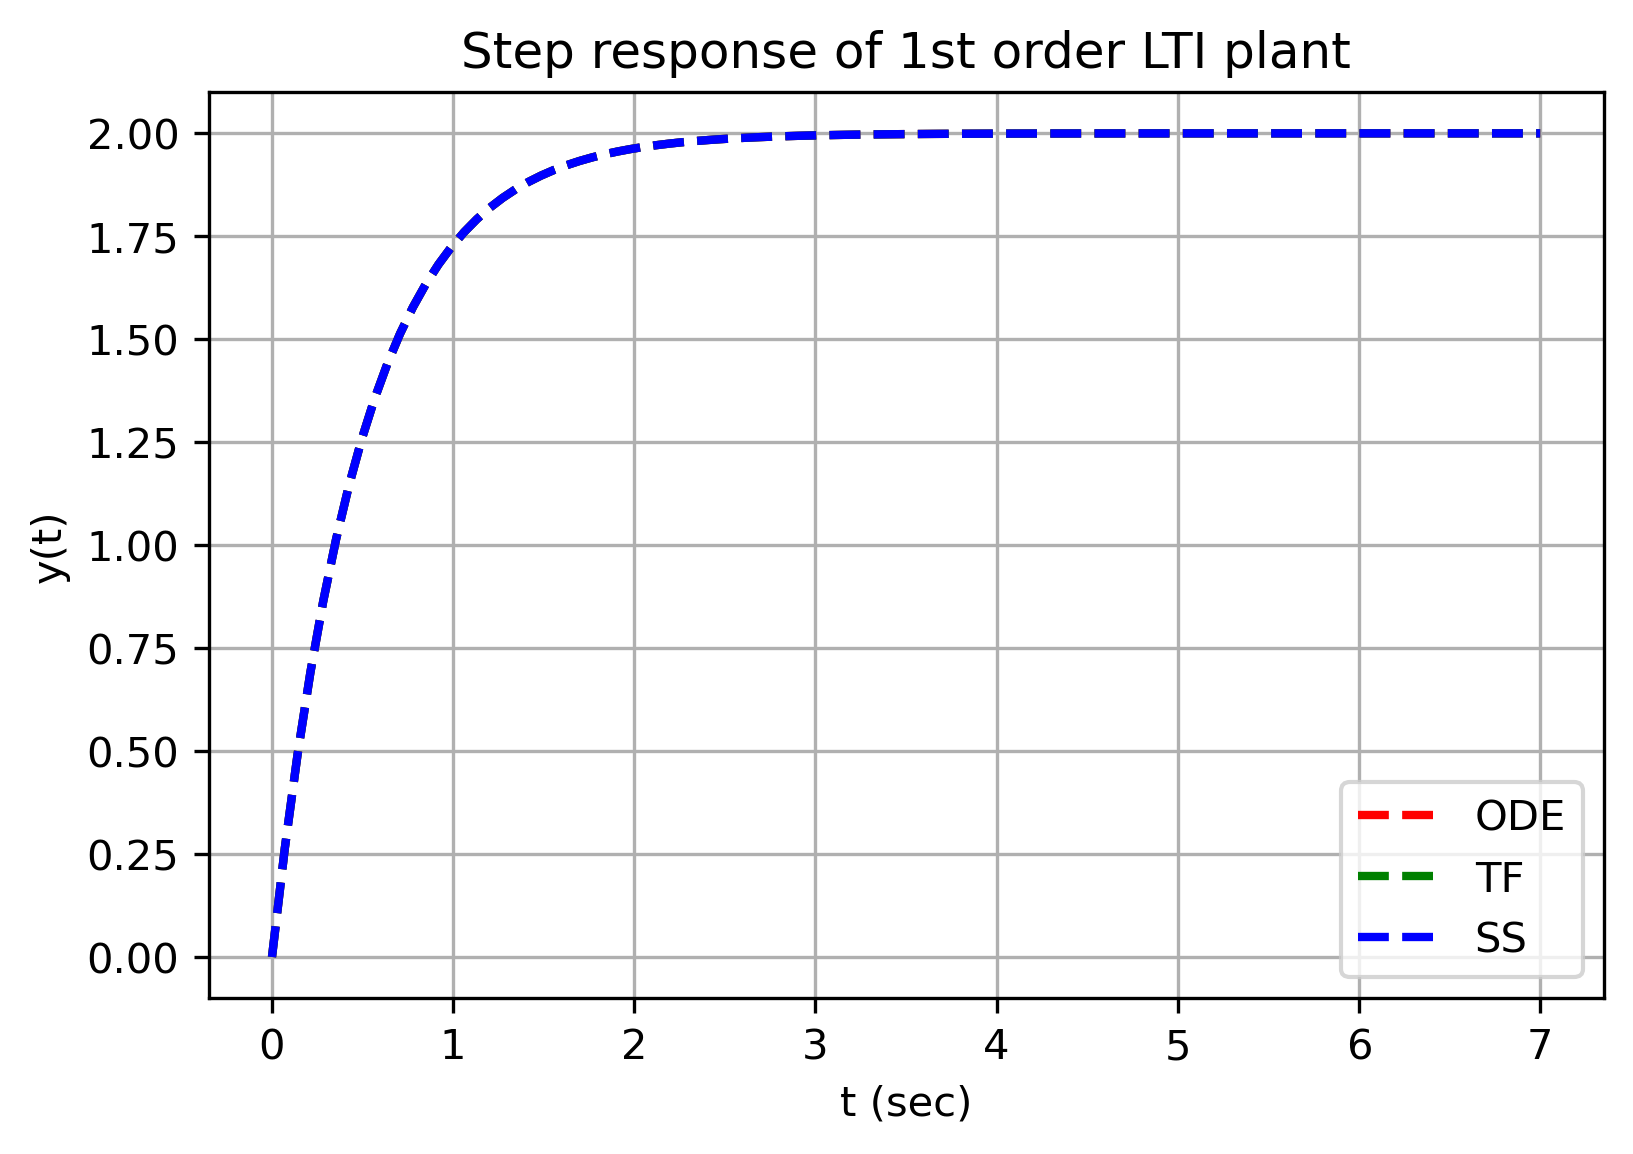

In [67]:
plt.plot(tspan, y1, 'r--', linewidth=2, label='ODE')
plt.plot(tspan, y2, 'g--', linewidth=2, label='TF')
plt.plot(tspan, y3, 'b--', linewidth=2, label='SS')

plt.title('Step response of 1st order LTI plant')
plt.xlabel('t (sec)')
plt.ylabel('y(t)')
plt.grid()
plt.legend(loc='best')
plt.show()

***Effects of $\tau$ on the system's dynamic***

In [68]:
tspan = np.linspace(0, 7, 1000)

*Using numerical integration: `odeint`*

In [69]:
def Sys1(y, t, K, tau, u0, delay):
    u = u0 * ( t>= delay ) # DELAYED INPUT
    doty = -1/tau*y + K/tau*u
    return doty

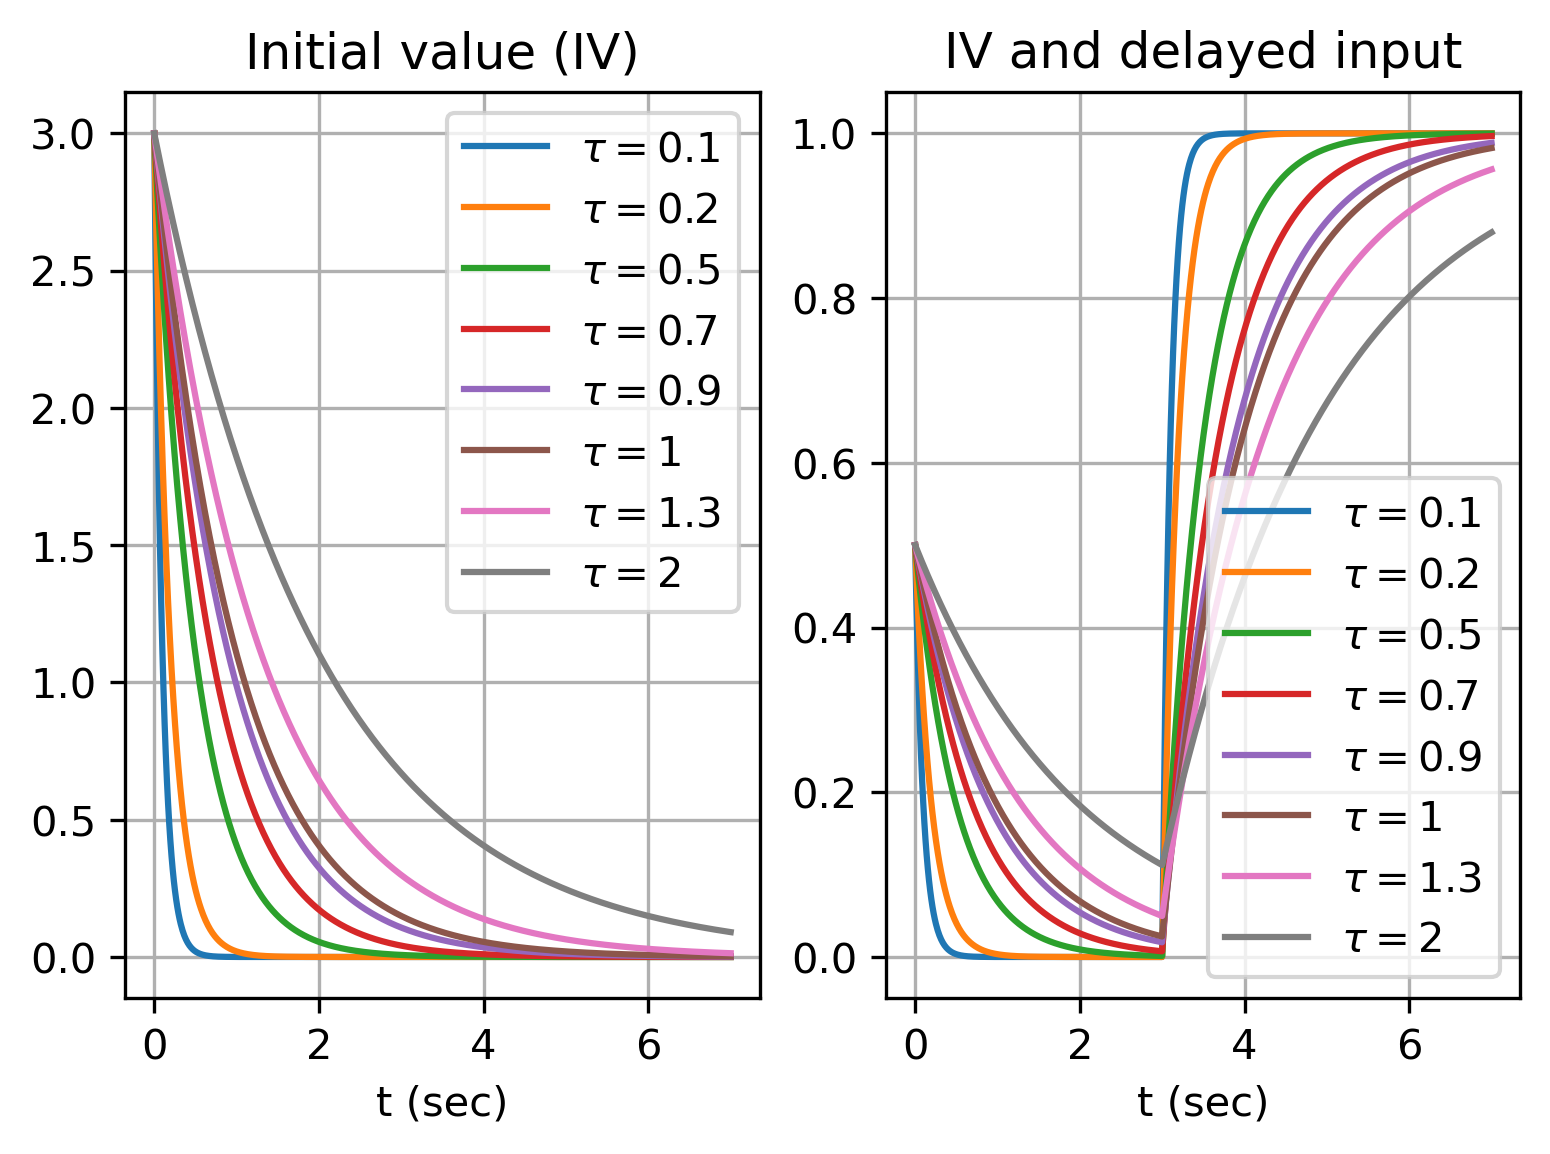

In [70]:
_, (ax1, ax2) = plt.subplots(1, 2)
ax1.set(title='Initial value (IV)', xlabel='t (sec)')
ax2.set(title='IV and delayed input', xlabel='t (sec)')
ax1.grid(); ax2.grid()

for tau in [.1, .2, .5, .7, .9, 1, 1.3, 2]:
    y = odeint(Sys1, 3, tspan, args=(1, tau, 0, 0))
    ax1.plot(tspan, y, label=fr'$\tau={tau}$')
    y = odeint(Sys1, .5, tspan, args=(1, tau, 1, 3))
    ax2.plot(tspan, y, label=fr'$\tau={tau}$')

ax1.legend(); ax2.legend()

*Using transfer function: `tf`*

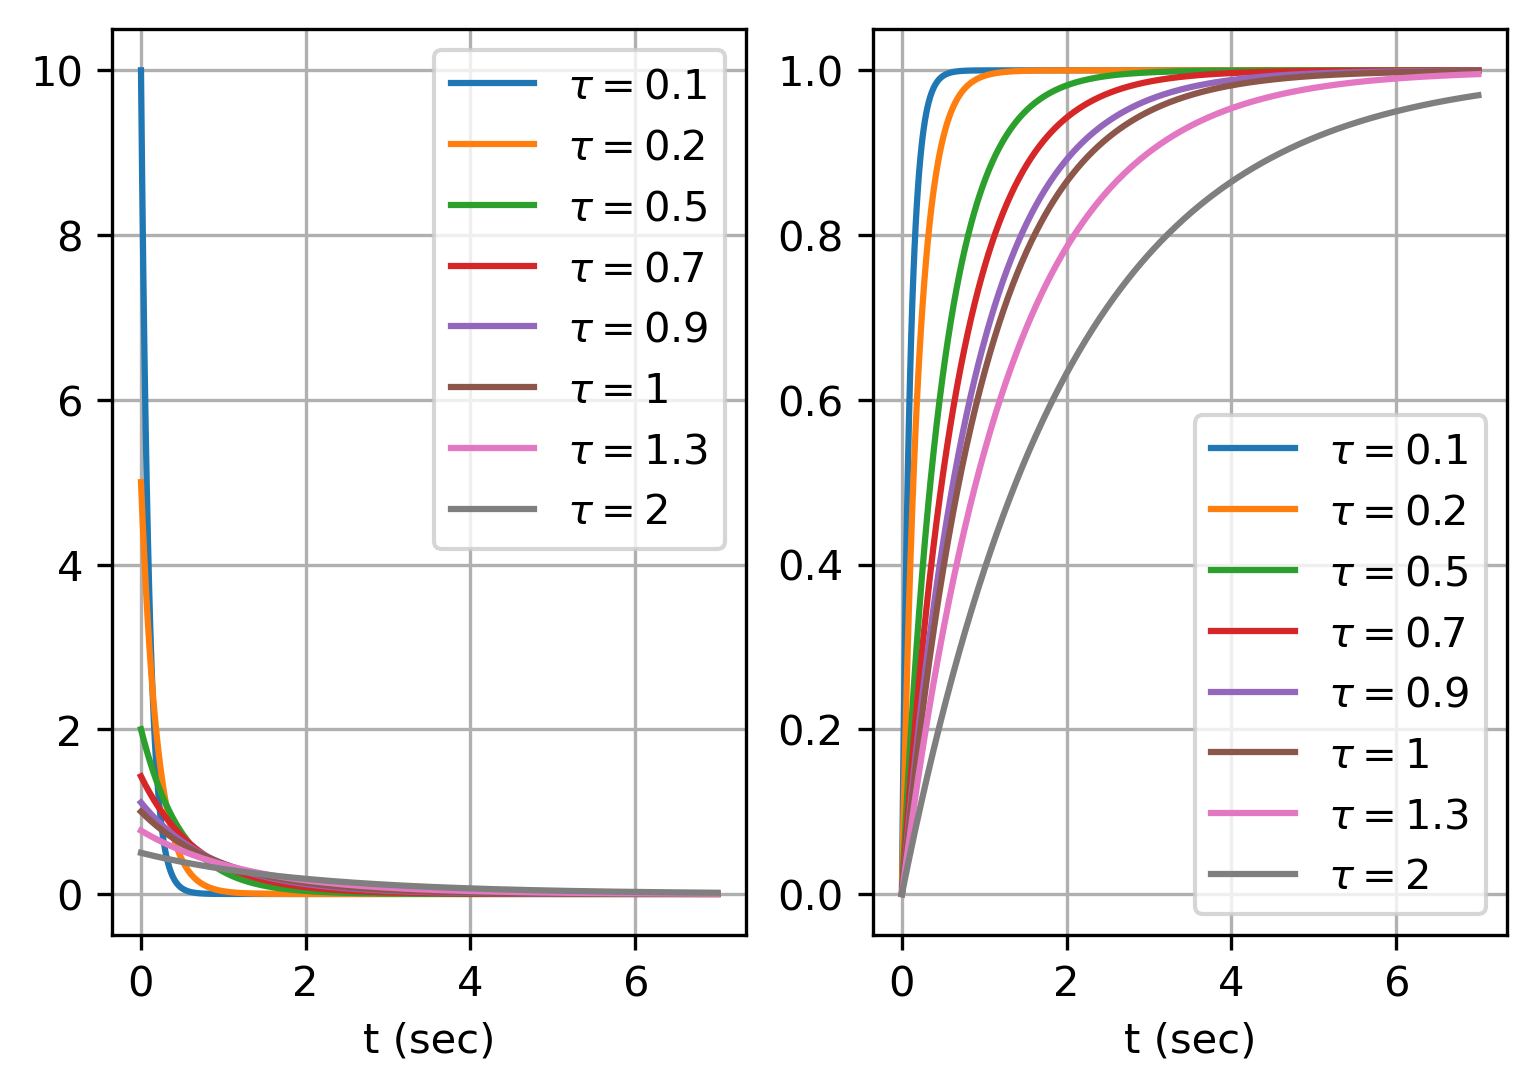

In [71]:
_, ax = plt.subplots(1, 2) # `ax` is a tuple containing two axes, aligned side by side horizontally.
ax[0].grid(); ax[1].grid() # `ax[i]` access the ith axis, i.e., `subplot(1, 2, i+1)`
ax[0].set(xlabel='t (sec)'); ax[1].set(xlabel='t (sec)')
for tau in [.1, .2, .5, .7, .9, 1, 1.3, 2]:
    # CONSTRUCT THE TF `h`
    h = tf([1], [tau, 1])
    # IMPULSE RESPONSE
    _, y = impulse(h, T=tspan)
    ax[0].plot(tspan, y, label=fr'$\tau={tau}$')
    # STEP RESPONSE
    _, y = step(h, T=tspan)
    ax[1].plot(tspan, y, label=fr'$\tau={tau}$')
    
ax[0].legend(); ax[1].legend()

*Using state space representation: `ss`*

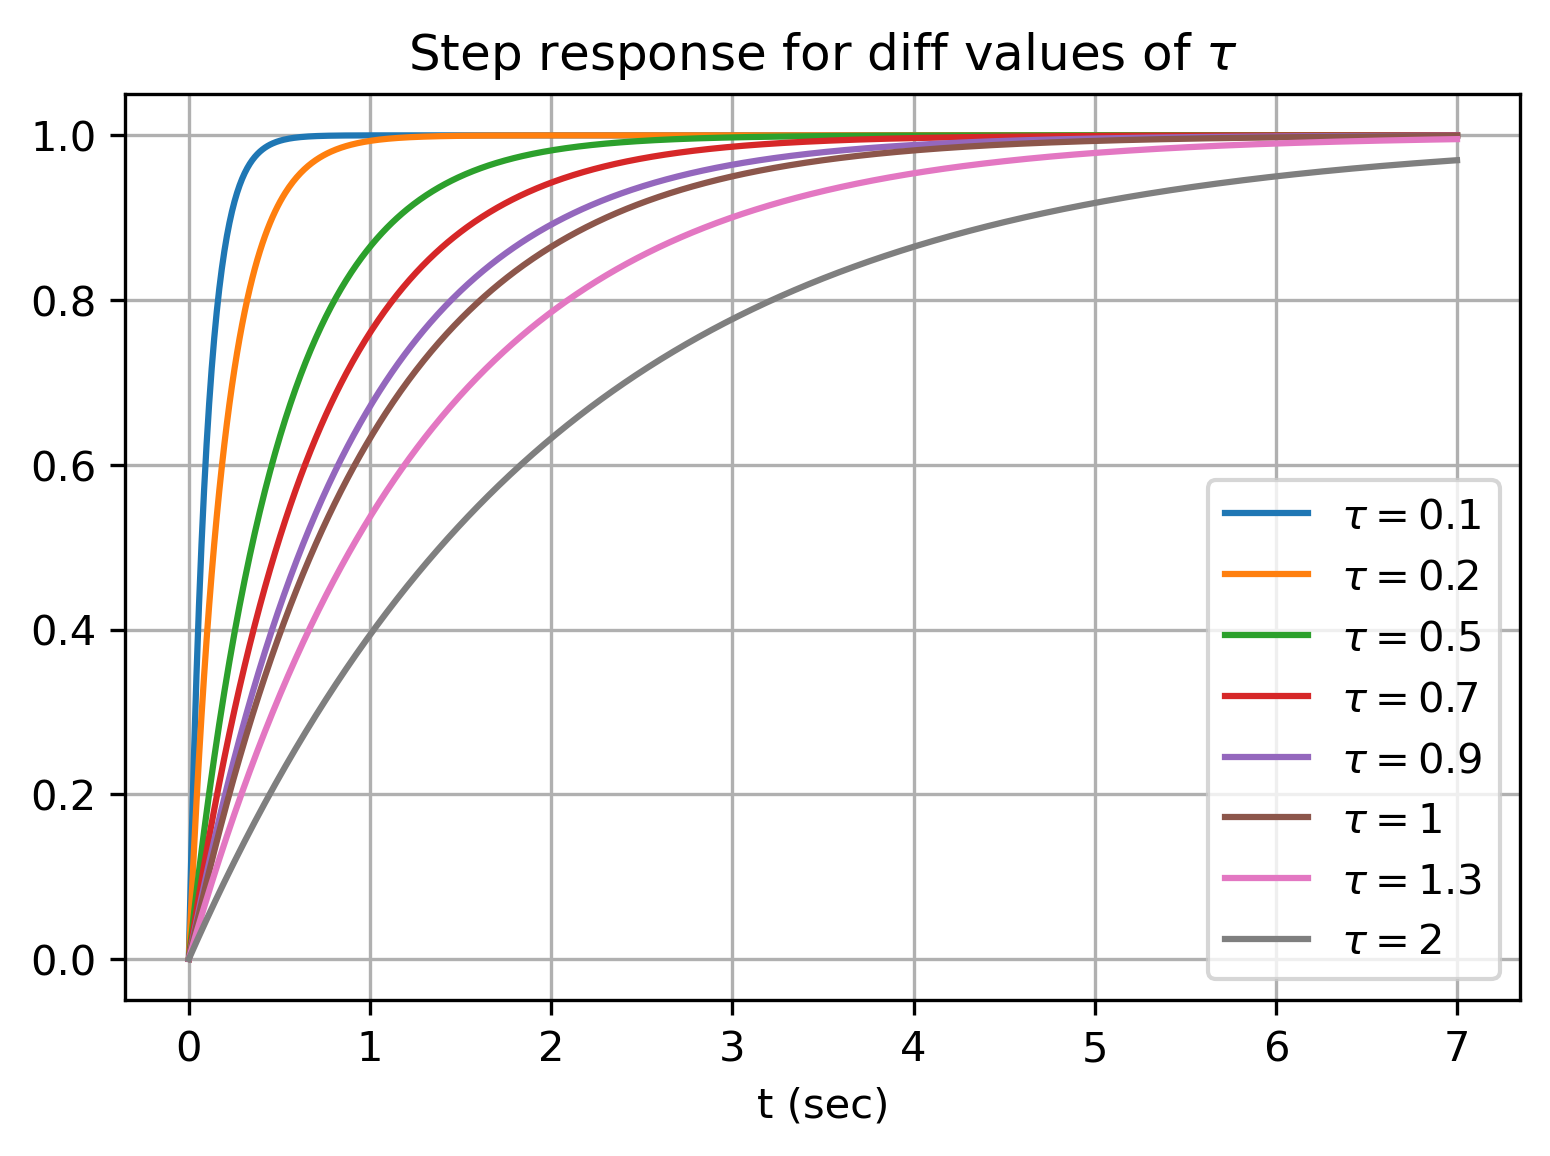

In [72]:
for tau in [.1, .2, .5, .7, .9, 1, 1.3, 2]:
    A, B, C, D = [-1/tau], [1/tau], [1], [0]
    hSS = ss(A, B, C, D)
    _, ySS = step(hSS, T=tspan)
    plt.plot(tspan, ySS, label=fr'$\tau={tau}$')

plt.title(r'Step response for diff values of $\tau$')
plt.xlabel('t (sec)')
plt.legend()
plt.grid()

# CASE OF SECOND ORDER PLANT

$$\dfrac{d^2y}{dt^2}+2\times m\times \omega_0\dfrac{dy}{dt}+\omega_{0}^{2} y(t) \;=\; k\omega_{0}^{2} u(t),\qquad\text{where: }y(0)=0 \;\&\; \dot{y}(0)=0$$

In [73]:
                    #########################
k, m, o = 1, 1, 1.5 # SIMULATION'S SETTINGS #
                    #########################

**Numeric Integration: ODE**

In [74]:
def mySys(x, t):
	u = 1
	dotx = [x[1], -o**2*x[0]-2*m*o*x[1] + k*o**2*u]
	return dotx

In [75]:
from scipy.integrate import odeint

In [76]:
tspan = np.linspace(0.0, 10.0, 100)
vect = odeint(mySys, [0, 0], tspan)
y1 = vect[:, 0]

**Transfer Function**

In [77]:
from scipy.signal import TransferFunction as tf

In [78]:
hTF = tf([k*o**2], [1, 2*m*o, o**2])
_, y2 = step(hTF, T=tspan)

**State Space**

In [79]:
from scipy.signal import StateSpace as ss

In [80]:
A = np.array([[0, 1], [-o**2, -2*m*o]])
B = np.array([[0], [k*o**2]])
C = np.array([[1, 0]])
D = np.array([[0]])

hSS = ss(A, B, C, D)
_, y3 = step(hSS, T=tspan)

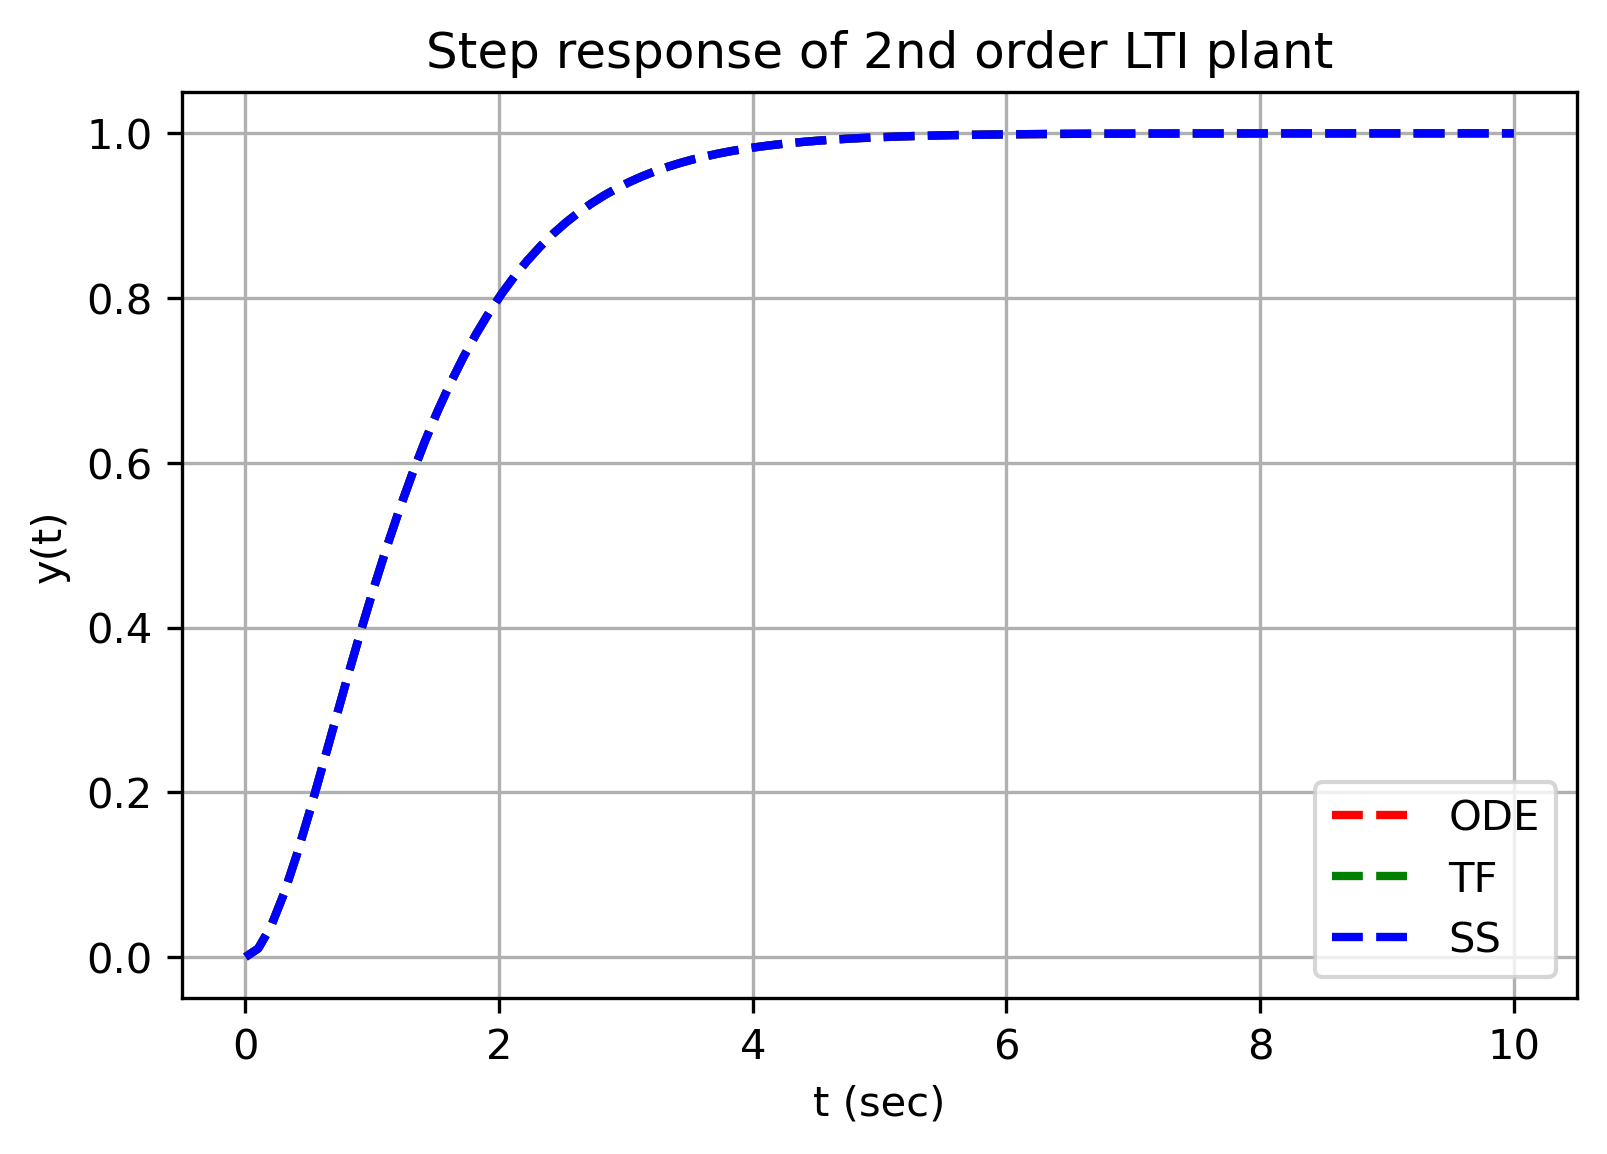

In [81]:
plt.plot(tspan, y1, 'r--', linewidth=2, label='ODE')
plt.plot(tspan, y2, 'g--', linewidth=2, label='TF')
plt.plot(tspan, y3, 'b--', linewidth=2, label='SS')

plt.title('Step response of 2nd order LTI plant')
plt.xlabel('t (sec)')
plt.ylabel('y(t)')
plt.legend(loc='lower right')
plt.grid()

***Effects of some parameters, namely $\zeta$ and $\omega_0$, on the system's dynamic***

In [82]:
tspan = np.linspace(0, 25, 100)

*Effects $\zeta$*

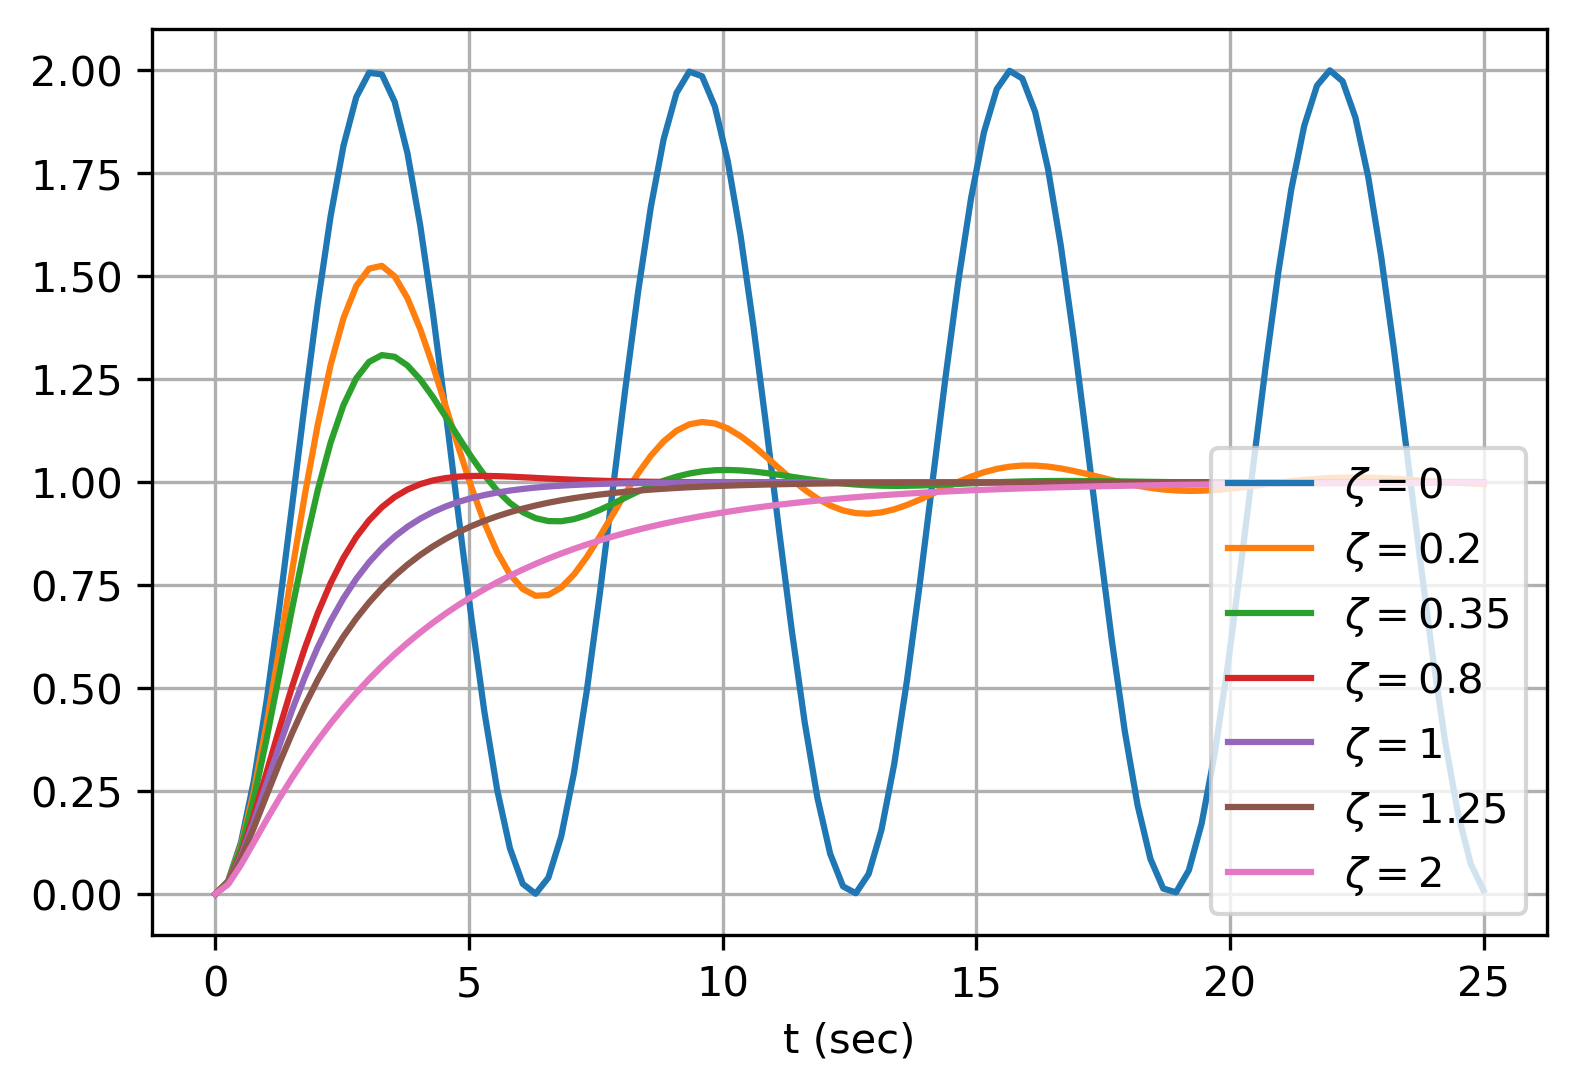

In [83]:
C = np.array([[1, 0]])
D = np.array([[0]])
k, o = 1, 1.0
for m in [0, .2, .35, .8, 1, 1.25, 2]:
    A = np.array([[0, 1], [-o**2, -2*m*o]])
    B = np.array([[0], [k*o**2]])
    hSS = ss(A, B, C, D)
    _, ySS = step(hSS, T=tspan)
    plt.plot(tspan, ySS, label=fr'$\zeta={m}$')
    
plt.xlabel('t (sec)')
plt.legend(loc='lower right')
plt.grid()

*Effects of $\omega_0$*

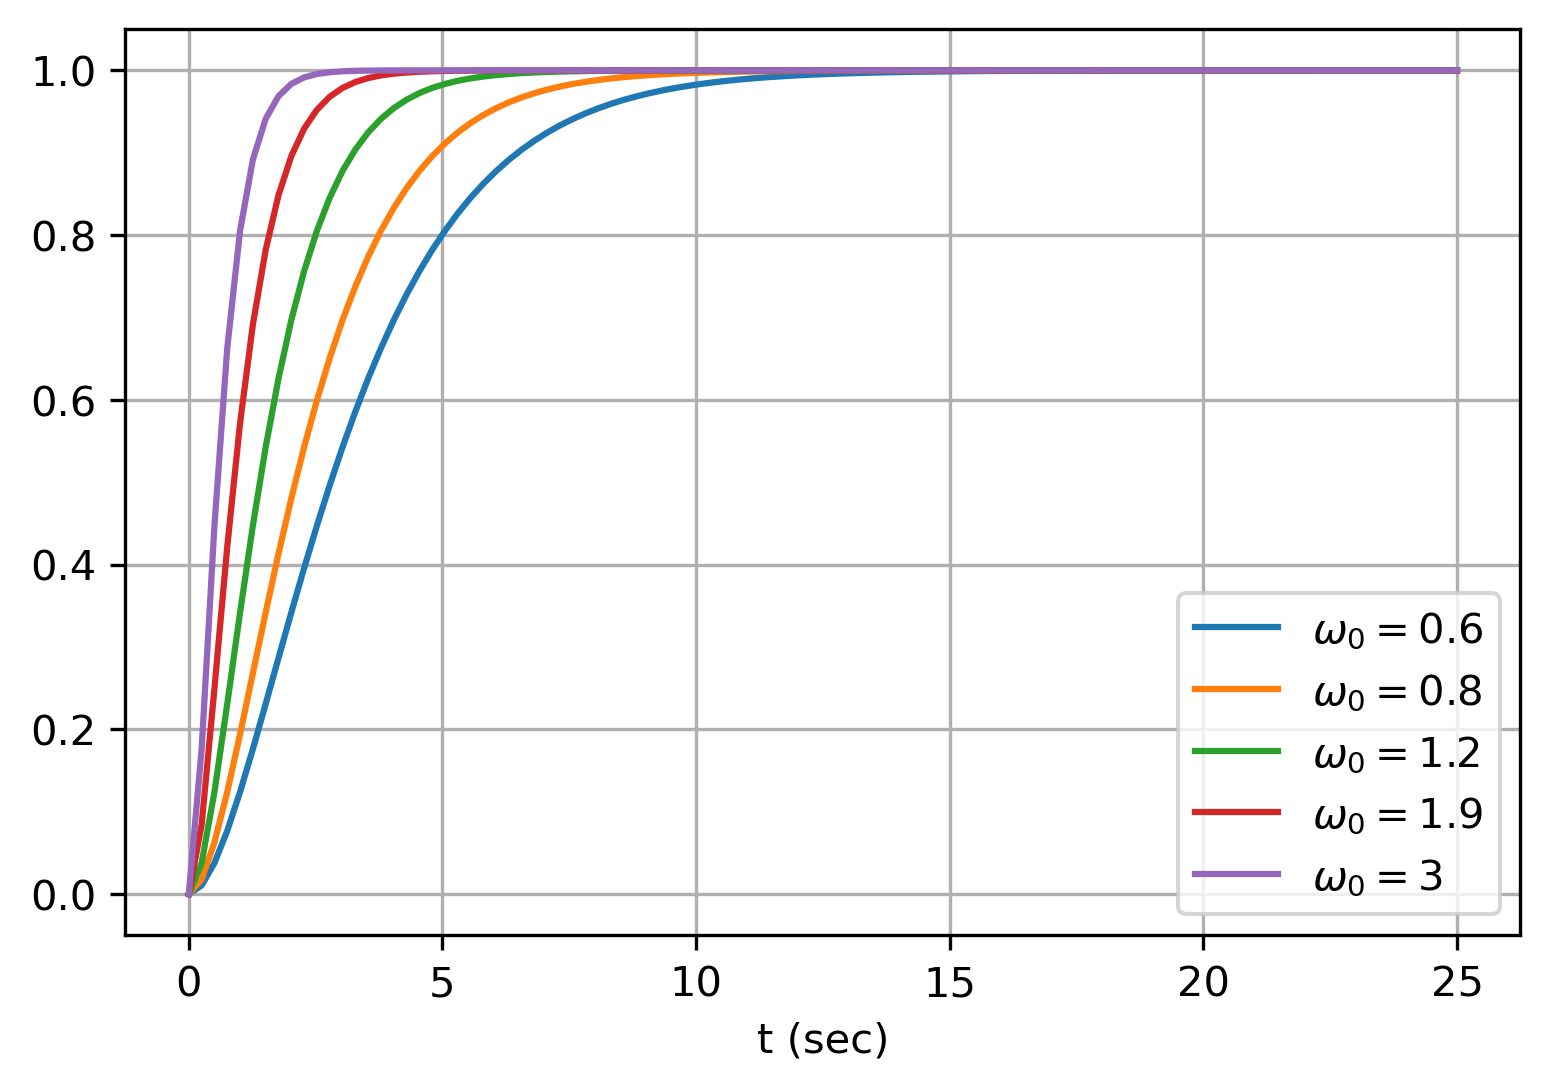

In [84]:
C = np.array([1, 0])
D = np.array([0])

K, m = 1, 1.
for o in [.6, .8, 1.2, 1.9, 3]:
    A = np.array([[0, 1], [-o**2, -2*m*o]])
    B = np.array([[0], [k*o**2]])
    h = ss(A, B, C, D)
    _, y = step(h, T=tspan)
    plt.plot(tspan, y, label=fr'$\omega_0={o}$')

plt.xlabel('t (sec)')
plt.legend()
plt.grid()
